In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import numpy as np
from salishsea_tools.nc_tools import scDataset
import scipy.io as sio
import numpy as np
import numpy.ma as ma
import math
import matplotlib.gridspec as gridspec

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot

sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

(cmapmc, norm) = functions_plot.Colormap()
from matplotlib.colors import ListedColormap
cmapmc_r = ListedColormap(cmapmc.colors[::-1])

In [3]:
data = sio.loadmat('./MackenzieTransects.mat')

struct_north = data['stn']
struct_south = data['sts']

dtype_north = struct_north.dtype
dtype_south = struct_south.dtype

data_north = {n: struct_north[n][0, 0] for n in dtype_north.names}
data_south = {n: struct_south[n][0, 0] for n in dtype_south.names}

In [4]:
lat_s = data_south['latx'][0,:]
lon_s = data_south['lonx'][0,:]

lat_n = data_north['latx'][0,:]
lon_n = data_north['lonx'][0,:]

In [2]:
def plot_map(fig, ax, x, y, z, cmapmc):
    if cmapmc == None:
        pass
    else:
        p = ax.pcolorfast(x, y, z, cmap=cmapmc, vmin=-1600, vmax=1000)
    CS = ax.contour(x, y, z, levels = np.arange(-500, 0, 20), colors='k', linestyle='-', alpha=0.5)
    for line in CS.collections:
        if line.get_linestyle() == [(None, None)]:
            print("Solid Line")
        else:
            line.set_linestyle([(None, None)])
            line.set_color('k')
    ax.clabel(CS, fmt='%1.1f')
    n=4
    ax.legend(loc=2, fontsize=20)
    ax.set_xlim([-141, -136])
    ax.set_ylim([69.5, 70.5])
    w=1/math.cos(math.radians(70.0))
    ax.set_aspect(w)
    ax.set_ylabel('latitude [$^o$]', fontsize=20)
    ax.set_xlabel('longitude [$^o$]', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    fig.tight_layout()
    return fig, ax

In [5]:
def get_vars(dirname):
    fname = "1_MCKNZ_1h_20170101_201701*"
    y,x = slice(1,-1,None), slice(1,-1,None)

    filesT = general_functions.get_files(dirname, fname, 'grid_T')
            
    with scDataset(filesT) as dsT:
        nav_lat = dsT.variables['nav_lat'][:]
        nav_lon = dsT.variables['nav_lon'][:]

    return nav_lat, nav_lon

In [19]:
ideal = nc.Dataset('../../../mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif.nc')['Bathymetry'][:]

In [6]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/initial_collection/ideal_base_muscl_partial/'
nav_lat, nav_lon = get_vars(dirname)

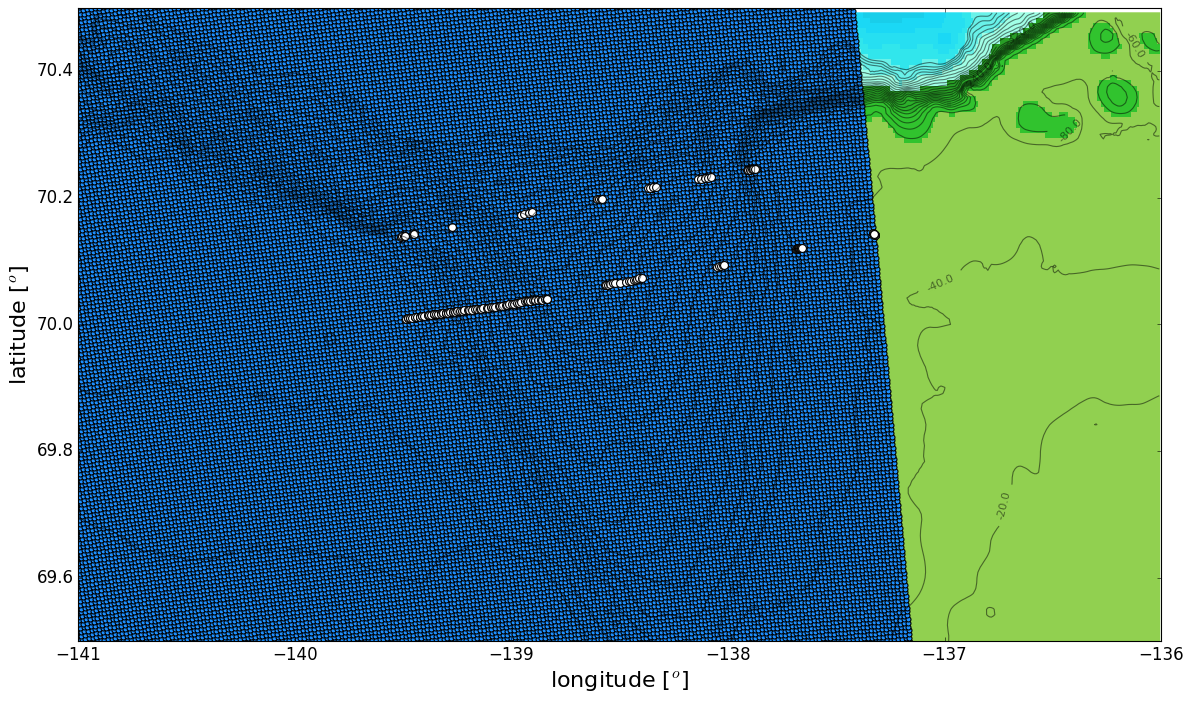

In [7]:
x, y, z = functions_plot.def_regionG(xl=-141, xr=-136, yb=69.5, yt=70.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig, ax = plot_map(fig, ax, x, y, z, cmapmc)
ax.scatter(nav_lon, nav_lat, s=20, edgecolors='k', c='dodgerblue')
ax.scatter(lon_s, lat_s, c='w', s=50, edgecolors='k')
ax.scatter(lon_n, lat_n, c='w', s=50, edgecolors='k')

In [8]:
def get_closest(array, point):
    diffs = np.fabs(array - point)
    inds = np.unravel_index(diffs.argmin(), diffs.shape)
    return inds

In [9]:
def get_closest_coords(nav_lon, nav_lat, lon, lat):
    
    all_inds_lon = np.full([len(lon), 2], np.nan)
    all_inds_lat = np.full([len(lat), 2], np.nan)
    
    for n in range(len(lon)):
        this_lon = lon[n]
        inds_lon = get_closest(nav_lon, this_lon)
        
        this_lat = lat[n]
        inds_lat = get_closest(nav_lat, this_lat)
        
        all_inds_lon[n, 0] = inds_lon[0]
        all_inds_lon[n, 1] = inds_lon[1]
        
        all_inds_lat[n, 0] = inds_lat[0]
        all_inds_lat[n, 1] = inds_lat[1]
        
    return all_inds_lon, all_inds_lat

In [10]:
all_inds_lon_s, all_inds_lat_s = get_closest_coords(nav_lon, nav_lat, lon_s, lat_s)

all_inds_lon_n, all_inds_lat_n = get_closest_coords(nav_lon, nav_lat, lon_n, lat_n)

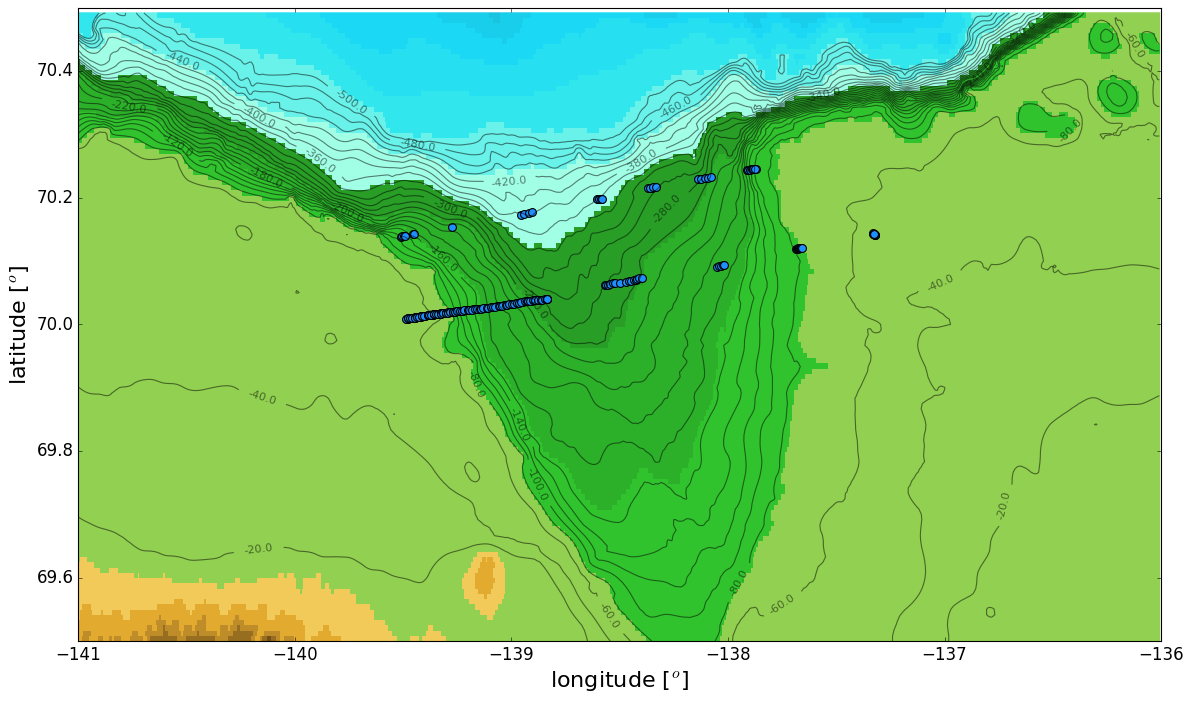

In [18]:
x, y, z = functions_plot.def_regionG(xl=-141, xr=-136, yb=69.5, yt=70.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig, ax = plot_map(fig, ax, x, y, z, cmapmc)

for n in range(all_inds_lon_s.shape[0]):
    j = all_inds_lon_s[n][0]
    i = all_inds_lon_s[n][1]
    
    jj = all_inds_lat_s[n][0]
    ii = all_inds_lat_s[n][1]
    
    ax.scatter(nav_lon[j, i], nav_lat[jj, ii], s=50, edgecolors='k', c='dodgerblue')
    
    
for n in range(all_inds_lon_n.shape[0]):
    j = all_inds_lon_n[n][0]
    i = all_inds_lon_n[n][1]
    
    jj = all_inds_lat_n[n][0]
    ii = all_inds_lat_n[n][1]
    
    ax.scatter(nav_lon[j, i], nav_lat[jj, ii], s=50, edgecolors='k', c='dodgerblue')

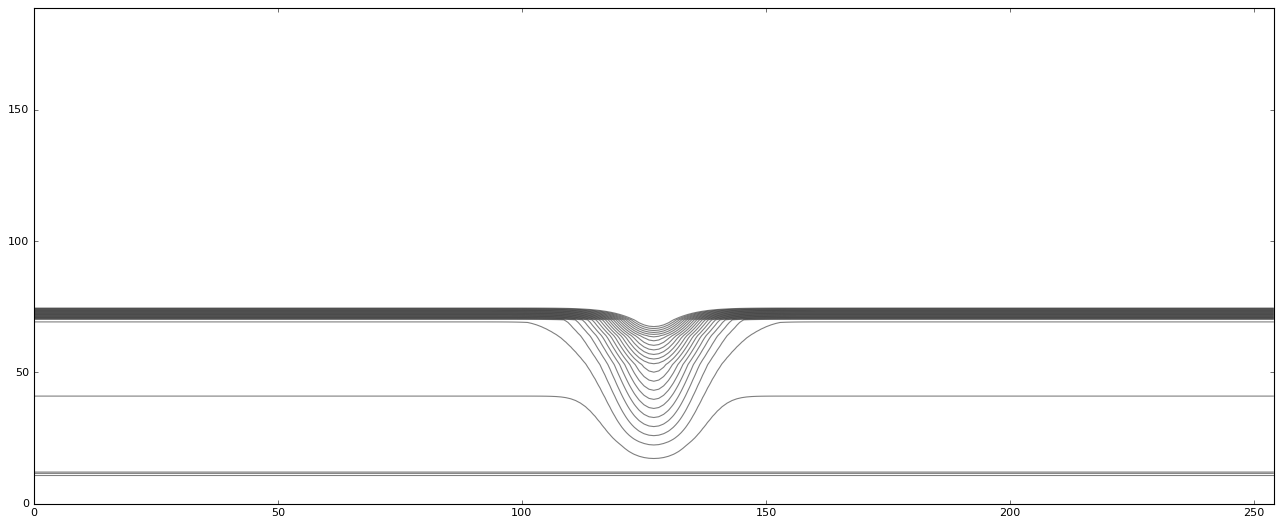

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.contour(ideal, levels = np.arange(0, 500, 20), colors='k', linestyle='-', alpha=0.5)

In [22]:
all_inds_lon_s

array([[   8.,  104.],
       [ 231.,  132.],
       [ 200.,  128.],
       [ 169.,  124.],
       [  19.,  106.],
       [ 139.,  121.],
       [ 108.,  117.],
       [  69.,  112.],
       [  70.,  112.],
       [  39.,  108.],
       [ 102.,  117.],
       [ 190.,  128.],
       [ 191.,  128.],
       [ 271.,  138.],
       [  97.,  116.],
       [  58.,  111.],
       [ 232.,  134.],
       [ 161.,  125.],
       [  90.,  116.],
       [  91.,  116.],
       [ 203.,  130.],
       [ 196.,  129.],
       [  93.,  116.],
       [ 203.,  131.],
       [   4.,  106.],
       [   5.,  106.],
       [ 261.,  138.],
       [ 174.,  127.],
       [  87.,  116.],
       [   8.,  106.],
       [ 270.,  140.],
       [ 247.,  137.],
       [   0.,  106.],
       [   1.,  106.],
       [ 273.,  140.],
       [ 210.,  132.],
       [ 234.,  136.],
       [   2.,  107.],
       [   3.,  107.],
       [ 268.,  140.],
       [  29.,  110.],
       [   6.,  107.],
       [   4.,  108.],
       [  2